[0.02072408 0.0307673  0.04060662 0.05024817 0.07352501 0.09568819]


C:\Users\pheng\AppData\Local\Temp\ipykernel_24152\207322567.py:53: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


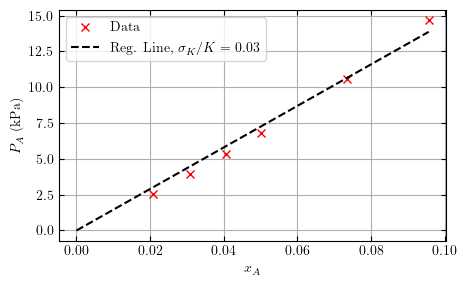

K_p = 144.99


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Operating pressure, kPa
P = 105.01

# Molar masses of A and B
MA = 17.03
MB = 18.02

# Weight fraction data
w = np.array([2,3,4,5,7.5,10])
# Partial pressure data, coverted to kPa
p_A = np.array([19.3,29.6,40.1,51.0,79.5,110])*101.325/760

# Moles B
n_B = 100/MB

# Moles A
n_A = w/MA

# Total moles
n_tot = n_A + n_B

# Mole frac A
x_A = n_A/n_tot

print(x_A)


# Linear regression lines
def line(a,b,x): return a*x + b

# K_p, for x_A, P_A plot
K_p, pcov_p = curve_fit(lambda x, K: K*x, x_A, p_A)

K_p = K_p[0]

# K, for x_A, y_A plot
K, pcov = curve_fit(lambda x, K: K*x, x_A, p_A/P)

K = K[0]

x = np.linspace(0,np.max(x_A),2)


font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (5,3)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "cmr10",
})


plt.plot(x_A,p_A,label='Data', marker = 'x', linestyle = 'none',color='r')
err = pcov_p[0,0]**0.5/K_p
plt.plot(x,line(K_p,0,x),label='Reg. Line, $\sigma_K/K =$ %0.2f' % err, linestyle = '--',color='k')
plt.xlabel('$x_A$')
plt.ylabel('$P_A$ (kPa)')
plt.grid('on')
plt.legend()
plt.tick_params(top='true', right='true', direction='in')
plt.show()

print('K_p = %0.2f' % K_p)
fig.savefig('CHEN_3100_HW_4_2_1.png',dpi=600,bbox_inches='tight')

C:\Users\pheng\AppData\Local\Temp\ipykernel_24152\3420506198.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


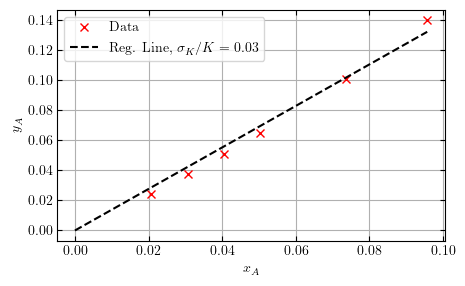

K = 1.38075506


In [63]:
fig, ax = plt.subplots()

plt.plot(x_A,p_A/P,label='Data', marker = 'x', linestyle = 'none',color='r')
err = pcov[0,0]**0.5/K
plt.plot(x,line(K,0,x),label='Reg. Line, $\sigma_K/K =$ %0.2f' % err, linestyle = '--',color='k')
plt.xlabel('$x_A$')
plt.ylabel('$y_A$')
plt.grid('on')
plt.legend()
plt.tick_params(top='true', right='true', direction='in')
plt.show()

print('K = %0.8f' % K)
fig.savefig('CHEN_3100_HW_4_2_2.png',dpi=600,bbox_inches='tight')

1.3807550633469277
V = 175215.79
L_Nmin = 237091.49
L_N0 = 230223.03
L_0 = 345334.54
L_N = 352203.00
L/V = 2.01
x_N = 0.0195
q = 0.0392
y1 = 0.000833
2.00843624624811
0.0008326394671107432
0.019501420872112044


C:\Users\pheng\AppData\Local\Temp\ipykernel_24152\4220547672.py:89: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


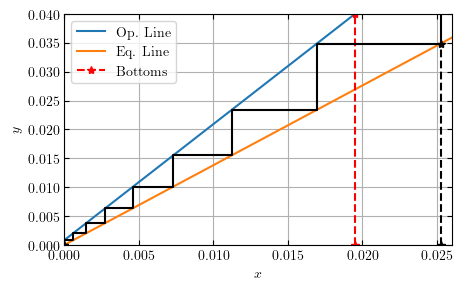

In [21]:
from scipy.optimize import root_scalar


# Inputs
x_0 = 0
y_N1 = 0.04
K = K
print(K)

P = 105100 # Pa
v = 4200 # m^3/hr
R = 8.3145 # Pa*m^3/mol*K
T = 303 # K

V = P*v/(R*T)
q = 0.98*y_N1
y1 = (y_N1-q)/(1-q)

L_Nmin = 0.98*V*K

L_0min = L_Nmin - 0.98*y_N1*V

L_0 = 1.5*L_0min
L_N = 0.98*y_N1*V + L_0
LV_N = L_N/V


x_N = 0.98*y_N1*V/L_N
b = y1
a = (y_N1-y1)/(x_N-x_0)
#a = (K*x_N-y1)/(x_N-x_0)

print('V = %0.2f' % V)
print('L_Nmin = %0.2f' % L_Nmin)
print('L_N0 = %0.2f' % L_0min)
print('L_0 = %0.2f' % L_0)
print('L_N = %0.2f' % L_N)
print('L/V = %0.2f' % LV_N)
print('x_N = %0.4f' % x_N)
print('q = %0.4f' % q)
print('y1 = %0.6f' % y1)

print(a)
print(b)
print(x_N)

x = np.linspace(0,1,5)

# Linear line, slope a, intercept b
def op_line(x,a,b): return a*x + b

# Stepping function to return step coordinates for graphing
def stepping_x(x_0,x_N,a,b,K):
    
    # Start at inlet comp
    x_n = x_0
    y_0 = op_line(x_0,K,0)
    
    # Resulting vapor equilibrium
    y_n = op_line(x_0,a,b)
    
    x_eq = [x_0,x_0]
    y_eq = [y_0,y_n]
    
    # Max 50 iterations
    for i in range(50):
        
        # Solve for next x value
        sol = root_scalar(lambda x: y_n-op_line(x,K,0),method='secant',x0=x_n)
        x_n = sol.root
        
        # Resulting vapor equilibrium
        y_n = op_line(x_n,a,b)
        
        # Add step coordinates
        x_eq = np.hstack((x_eq,[x_n,x_n]))
        y_eq = np.hstack((y_eq,[op_line(x_n,K,0),y_n]))
        
        if x_n > x_N:
            break
    
    return x_eq, y_eq



x_eq, y_eq = stepping_x(x_0,x_N,a,b,K)

# Plot results
fig, ax = plt.subplots()

# Plot operating line
plt.plot(x,op_line(x,a,b),label='Op. Line')
# PLot equilibrium line
plt.plot(x,op_line(x,K,0),label='Eq. Line')
# Plot desired bottom composition
plt.plot([x_N,x_N],[0,op_line(x_N,a,b)],color='r',linestyle='--',marker='*',label='Bottoms')

# Plot steps
plt.plot(x_eq,y_eq,color=[0,0,0])
plt.plot([x_eq[0],x_eq[0]],[0,y_eq[0]],color=[0,0,0],linestyle='--',marker='*')
plt.plot([x_eq[-1],x_eq[-1]],[0,y_eq[-2]],color=[0,0,0],linestyle='--',marker='*')



plt.legend(loc='best')
plt.xlabel('$x$',fontfamily='Serif')
plt.ylabel('$y$',fontfamily='Serif')

# Plot limits
plt.xlim([0,0.026])
plt.ylim([0,0.04])

plt.grid('on')
plt.tick_params(top='true',right='true',direction='in')
plt.show()


fig.savefig('CHEN_3100_HW_4_2_3.png',dpi=600,bbox_inches='tight')
#fig.savefig('CHEN_3100_HW_4_2_4.png',dpi=600,bbox_inches='tight')

In [22]:
L0 = L_0
VN1 = V
LN = L_N
V1 = L0 + VN1 - LN

A1 = L0/(K*V1)
AN = LN/(K*VN1)

A = (A1*AN)**0.5

def kremser(yn1,y1,x0,K,A): return np.log((yn1-K*x0)/(y1-K*x0)*(1-1/A)+1/A)/np.log(A)

N = kremser(y_N1,y1,x_0,K,A)

print(LN)
print(A)
print(N)

352203.0009969156
1.4706528011394622
7.19710867622287


C:\Users\pheng\AppData\Local\Temp\ipykernel_24152\3192707242.py:12: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


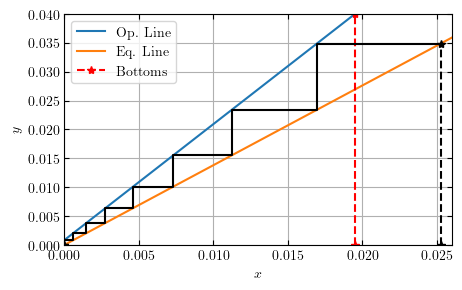

In [34]:
from CHEN_3100_Stepping import stepping

x = np.linspace(0,2*x_N,100)


op_line = lambda x: a*x + b
eq_line = lambda x: K*x

x_eq, y_eq = stepping(x_0,x_N,eq_line,op_line)

# Plot results
fig, ax = plt.subplots()

# Plot operating line
plt.plot(x,op_line(x),label='Op. Line')
# PLot equilibrium line
plt.plot(x,eq_line(x),label='Eq. Line')
# Plot desired bottom composition
plt.plot([x_N,x_N],[0,op_line(x_N)],color='r',linestyle='--',marker='*',label='Bottoms')

# Plot steps
plt.plot(x_eq,y_eq,color=[0,0,0])
plt.plot([x_eq[0],x_eq[0]],[0,y_eq[0]],color=[0,0,0],linestyle='--',marker='*')
plt.plot([x_eq[-1],x_eq[-1]],[0,y_eq[-2]],color=[0,0,0],linestyle='--',marker='*')



plt.legend(loc='best')
plt.xlabel('$x$',fontfamily='Serif')
plt.ylabel('$y$',fontfamily='Serif')

# Plot limits
plt.xlim([0,0.026])
plt.ylim([0,0.04])

plt.grid('on')
plt.tick_params(top='true',right='true',direction='in')
plt.show()


In [65]:
from scipy.optimize import root_scalar

K = 956.499559
N = 3.2

xn1 = (600*10**-6)*18.02/133.4

yn = 0.025
y0 = 0

S = lambda x1: K*(xn1 - x1)/yn

def kremser_S(xn1,x1,y0,K,S): return np.log((xn1-y0/K)/(x1-y0/K)*(1-1/S)+1/S)/np.log(S)

#f = lambda x1: (S(x1)-1)/(S(x1)**(N+1)-1) - x1/xn1
f = lambda x1: np.log((xn1-y0/K)/(x1-y0/K)*(1-1/S(x1))+1/S(x1)) - N*np.log(S(x1))

sol = root_scalar(f,x0=0.000001)

x1 = sol.root

extraction = (xn1-x1)/xn1

print('x_{N+1} = %0.8f' % xn1)
print('x_1 = %0.8e' % x1)
print('The percent extraction is %0.3f' % extraction)


x_{N+1} = 0.00008105
x_1 = 1.56297958e-06
The percent extraction is 0.981


In [60]:
from scipy.optimize import root_scalar

K = 956.499559
N = 3.2

xn1 = (600*10**-6)*18.02/133.4

yn = 0.025
y0 = 0

VL = lambda x1: (xn1 - x1*(1-xn1)/(1-x1))/yn
SN = lambda x1: K*VL(x1)
S1 = lambda x1: K*VL(x1)*(1-yn)*(1-xn1)/(1-x1)


S = lambda x1: np.sqrt(S1(x1)*SN(x1))

def kremser_S(xn1,x1,y0,K,S): return np.log((xn1-y0/K)/(x1-y0/K)*(1-1/S)+1/S)/np.log(S)

f = lambda x1: (S(x1)-1)/(S(x1)**(N+1)-1) - x1/xn1

sol = root_scalar(f,x0=0.000001)

x1 = sol.root

extraction = (xn1-x1*(1-xn1)/(1-x1))/xn1

print('x_{N+1} = %0.8f' % xn1)
print('x_1 = %0.8e' % x1)
print('The percent extraction is %0.3f' % extraction)


x_{N+1} = 0.00008105
x_1 = 1.62170776e-06
The percent extraction is 0.980
3.0617824022995372
